<h2>Introduction</h2>

Welcome to this first new (not perfect) notebook, where I'm playing with some machine learning models on sports data.

As a football passionate, I'll be tackling quite a funny and interesting topic : Predicting the Market Value of a English Premier League Football Player, giving many features.

Clearly a regression problem, let's dive into it !

<h2>Importing stuff</h2>

In [340]:
## Processing/Evaluating libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas import scatter_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

## Models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR

%matplotlib inline

<h2>Data processing</h2>

In [341]:
df = pd.read_csv('epldata_final.csv')

In [342]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [343]:
## Let's first drop some features that are obviously not related to our target 'market_value'

## Name is not important
df = df.drop('name',axis=1)

## The nationality is not important (SAY NO TO RACISM)
df = df.drop('nationality',axis=1)

In [344]:
## Let's check the columns types
df.dtypes

club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object

In [345]:
## We have three objects here : club, position and fpl_sel
## For club and position, we have two mapping values : club_id and position_cat. So let's just drop them
df = df.drop('club',axis=1)
df = df.drop('position',axis=1)

## For the third one : fpl_sel, we need to remove the percentage sign
df.fpl_sel = df.fpl_sel.apply(lambda x : float(x.split('%')[0]))

In [346]:
df.dtypes

age               int64
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel         float64
fpl_points        int64
region          float64
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object

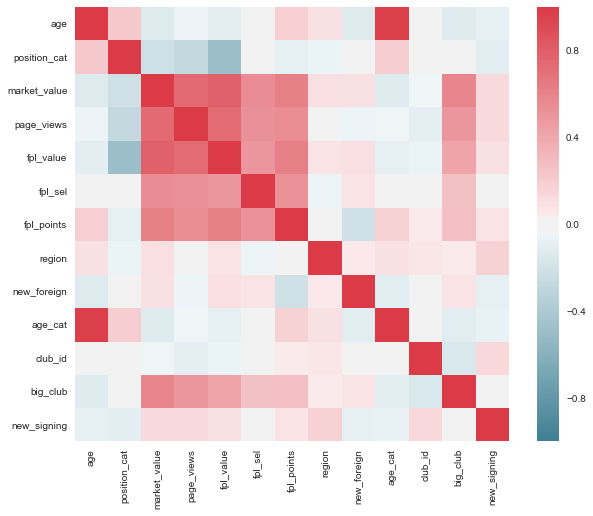

In [347]:
## No more object columns in our dataset :) !

## Let's check the correlation heat map
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

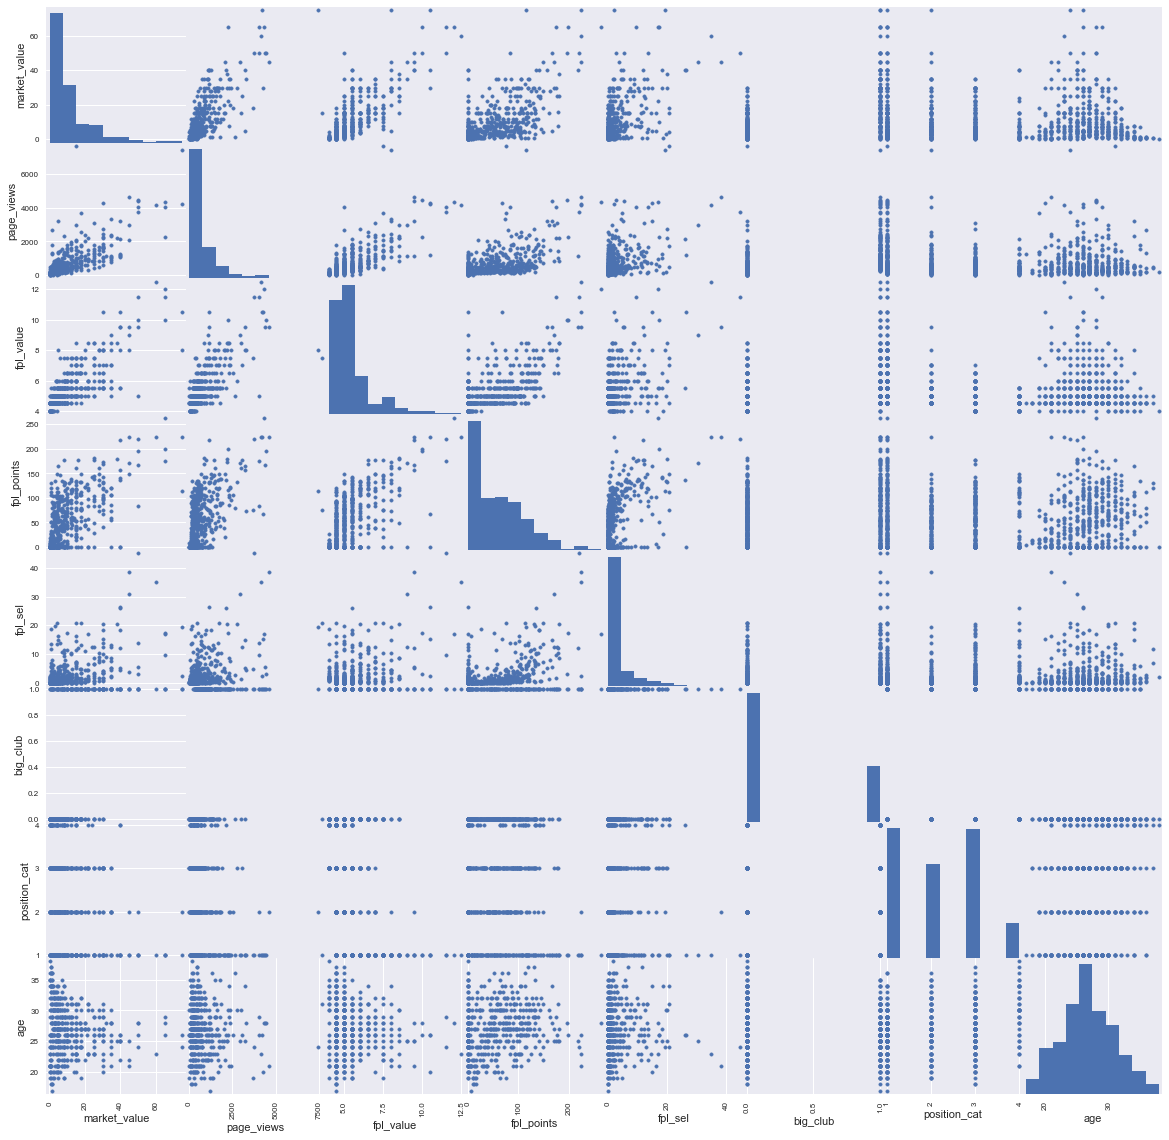

In [348]:
## It seems that our target variable market_value is quite correlated to those variables :
## 'page_views','fpl_value','fpl_points','fpl_sel','big_club','position_cat','age'

## Let's plot the scatter matrix
plot = scatter_matrix(df[['market_value','page_views','fpl_value','fpl_points','fpl_sel','big_club','position_cat','age']],alpha=1, figsize=(20, 20))

In [349]:
## Keeping only the features that are enough correlated to 'market_value'
df_final = df[['market_value','page_views','fpl_value','fpl_points','fpl_sel','big_club','position_cat','age']]

In [350]:
df_final.isnull().sum()

market_value    0
page_views      0
fpl_value       0
fpl_points      0
fpl_sel         0
big_club        0
position_cat    0
age             0
dtype: int64

In [351]:
## Splitting the dataset

X = df_final[df_final.columns[1:6]]
y = df_final.market_value

In [352]:
## Scaling X data 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h2> Data Predictive modeling </h2>

In [353]:
## Using a Linear Regression model 

linear_reg = LinearRegression()
kfold = KFold(n_splits=10, random_state=42)
results = cross_val_score(linear_reg, X_scaled,y, cv=kfold, scoring='neg_mean_squared_error')

print("MSE: %.3f (%.3f)") % (results.mean(), results.std())

MSE: -39.725 (26.908)


In [354]:
## Using a Lasso regression

lasso_reg = LassoCV(n_alphas=100,cv=5, normalize=False)
kfold = KFold(n_splits=10, random_state=42)
results = cross_val_score(lasso_reg, X_scaled,y, cv=kfold, scoring='neg_mean_squared_error')

print("MSE: %.3f (%.3f)") % (results.mean(), results.std())

MSE: -39.672 (26.908)


In [355]:
## Using a Ridge regression 

alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
ridge_reg = RidgeCV(alphas=alpha_ridge,cv=5, normalize=False)
kfold = KFold(n_splits=10, random_state=42)
results = cross_val_score(ridge_reg, X_scaled,y, cv=kfold, scoring='neg_mean_squared_error')

print("MSE: %.3f (%.3f)") % (results.mean(), results.std())

MSE: -39.724 (27.302)


In [356]:
## Using a DecisionTree Regressor

dec_tree_reg = DecisionTreeRegressor()
kfold = KFold(n_splits=10, random_state=42)
results = cross_val_score(dec_tree_reg, X_scaled,y, cv=kfold, scoring='neg_mean_squared_error')

print("MSE: %.3f (%.3f)") % (results.mean(), results.std())

MSE: -71.845 (51.445)


In [357]:
## Using a Support Vector Regressor

svr = SVR()
kfold = KFold(n_splits=10, random_state=42)
results = cross_val_score(dec_tree_reg, X_scaled,y, cv=kfold, scoring='neg_mean_squared_error')

print("MSE: %.3f (%.3f)") % (results.mean(), results.std())

MSE: -71.282 (48.406)


<h2>Learning curves</h2>

Let's view our models' learning curves for a better visualisation/analysis of variance and bias, to track over/underfitting

In [358]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\Users\Yassine\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

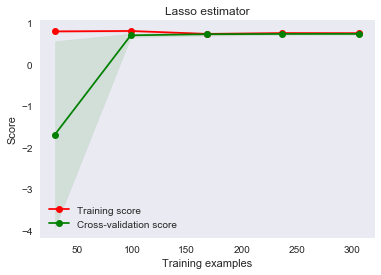

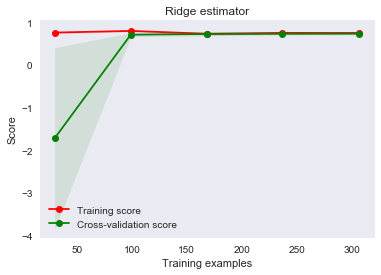

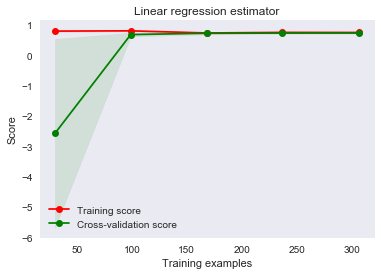

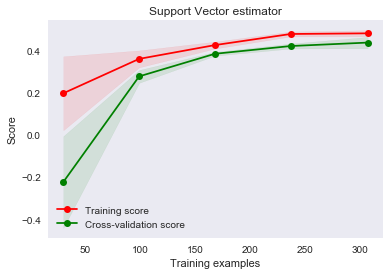

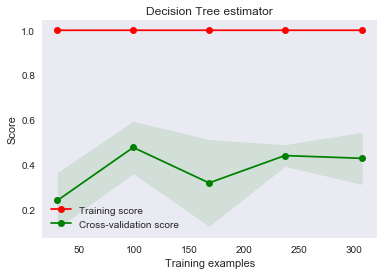

In [359]:
plot_learning_curve(lasso_reg,'Lasso estimator',X_scaled,y)
plot_learning_curve(ridge_reg,'Ridge estimator',X_scaled,y)
plot_learning_curve(linear_reg,'Linear regression estimator',X_scaled,y)
plot_learning_curve(svr,'Support Vector estimator',X_scaled,y)
plot_learning_curve(dec_tree_reg,'Decision Tree estimator',X_scaled,y)

From those graphs we can notice the following :
- Lasso, Ridge and Linear models are performing quite well (high score, little gap between train and test curve)
- Support Vector model is performing poorly, reaching a plateau with a low score (high bias), little bigger gap between train and test curves
- Decision Tree model is severly overfitting the training data (maximum score), with a high variance (huge gap between train and test curves)

So for this problem, we can pick a <b>Lasso</b> model, as it has the lowest MSE